In [1]:
import pandas as pd

In [2]:
#leggo i dataset contenenti i film con relativi id,nomi e generi
movies_df = pd.read_csv('dataset/ml-1m/movies.dat',
                        delimiter='::', engine= 'python', header=None,
                        names=['movie_id','movie_name', 'genre'], encoding='latin-1')
movies_df.head()


,movie_id,movie_name,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
ratings_df=pd.read_csv('dataset/ml-1m/ratings.dat',delimiter='::', engine= 'python', header=None,
    names=['userId', 'movie_id', 'rating','timestamp'], encoding='latin-1')
ratings_df.head()

,userId,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
print("Movies:",movies_df.shape)
print("Ratings:",ratings_df.shape)

Movies: (3883, 3)
Ratings: (1000209, 4)


In [13]:
movies_merged_df=movies_df.merge(ratings_df, on='movie_id')
movies_merged_df.head()

,movie_id,movie_name,genre,userId,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [15]:
movies_average_rating=movies_merged_df.groupby('movie_name')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,movie_name,Average Rating
0,Ulysses (Ulisse) (1954),5.0
1,Lured (1947),5.0
2,Follow the Bitch (1998),5.0
3,Bittersweet Motel (2000),5.0
4,Song of Freedom (1936),5.0


In [17]:
movies_rating_count=movies_merged_df.groupby('movie_name')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='movie_name')
movies_rating_count_avg.head()

,movie_name,Rating Count,Average Rating
0,Another Man's Poison (1952),1,4.0
1,Night Tide (1961),1,2.0
2,Shadows (Cienie) (1988),1,1.0
3,"McCullochs, The (1975)",1,1.0
4,Anna (1996),1,4.0


In [31]:
users_rating_count=movies_merged_df.groupby('userId')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'})
users_rating_count.head()

,userId,Rating Count
0,947,20
1,4068,20
2,2530,20
3,341,20
4,5258,20


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
#plt.style.use('dark_background')


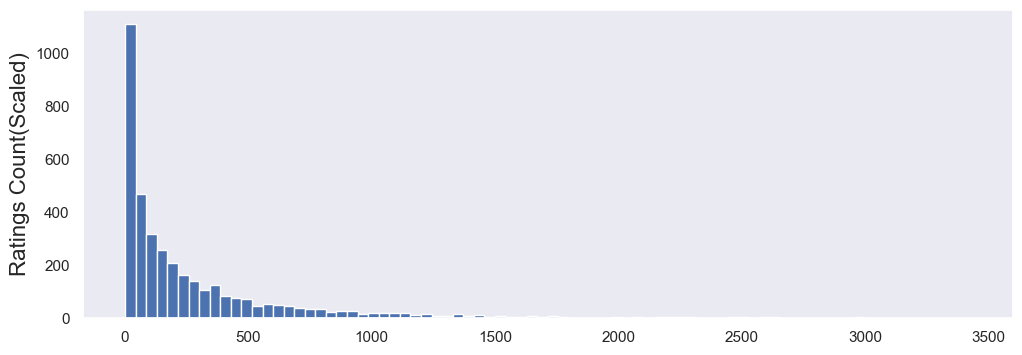

In [28]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Rating Count'],bins=80)
plt.ylabel('Ratings Count(Scaled)', fontsize=16)
plt.savefig('img/ratingcounthist.jpg')

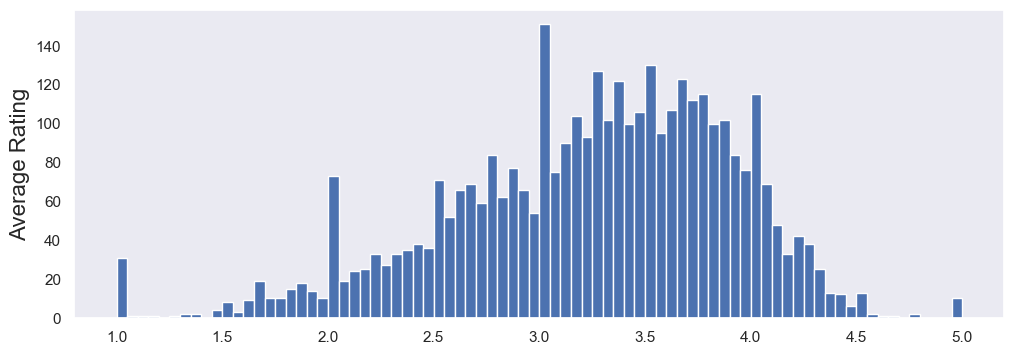

In [29]:
plt.figure(figsize=(12,4))
plt.hist(movies_rating_count_avg['Average Rating'],bins=80)
plt.ylabel('Average Rating',fontsize=16)
plt.savefig('img/avgratinghist.jpg')

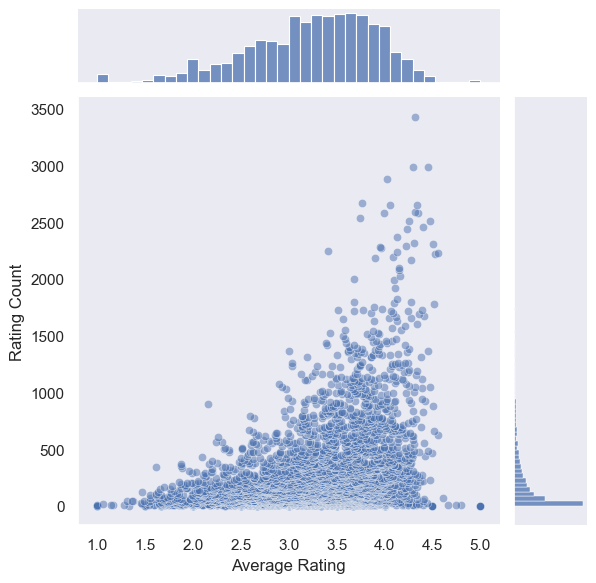

In [30]:
plot=sns.jointplot(x='Average Rating',y='Rating Count',data=movies_rating_count_avg,alpha=0.5)
plot.savefig('img/joinplot.jpg')

C:\Users\Elia\AppData\Local\Temp\ipykernel_13220\1098238540.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


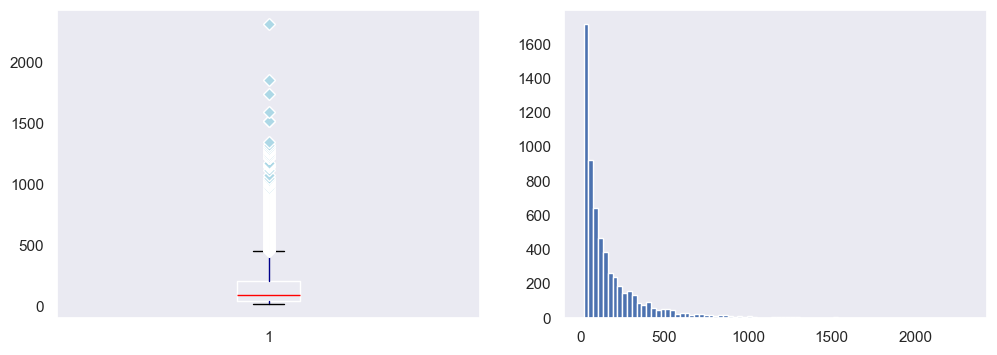

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
box_colors = {
    'boxes': 'lightblue',
    'whiskers': 'darkblue',
    'medians': 'red',
    'caps': 'black'
}
ax1.boxplot(users_rating_count['Rating Count'],flierprops=dict(markerfacecolor='lightblue', marker='D'),
            whiskerprops=dict(color=box_colors['whiskers']),
            medianprops=dict(color=box_colors['medians']),
            capprops=dict(color=box_colors['caps']))
ax2.hist(users_rating_count['Rating Count'],bins=80)
fig.show()
plt.savefig('img/avg_user_rating_count.jpg')

In [47]:
from sklearn.manifold import TSNE